In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
# load Fashion mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
print(y_train.shape)
num_classes=len(np.unique(y_train))
print(num_classes)

(60000,)
10


| Label | Class Name   |
|------:|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot


In [7]:

# normalize the data
'''We normalize so the model learns faster, better, and more accurately by working with values 
between 0 and 1 instead of 0 to 255. 
 astype('float32') → allows decimals 
/ 255.0 → produces decimal values '''
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
''' 
CNN models expect images with channels: (number_of_images, height, width, channels)
our fashion-mnist images contain (60000,28,28) missing channel 
for grayscale images channels= 1

To add chanel we use  tf.expand_dims() adds a new dimension. axis=-1 add it at the last poistion
'''

print("Before: ", x_train.shape)
x_train = tf.expand_dims(x_train, axis=-1)
x_test  = tf.expand_dims(x_test, axis=-1)

print("After: ", x_train.shape)

Before:  (60000, 28, 28)
After:  (60000, 28, 28, 1)


[[0,0], [2,2], [2,2], [0,0]] means 
| Dimension | Meaning  | Padding           |
| --------- | -------- | ----------------- |
| `[0,0]`   | batch    | no padding        |
| `[2,2]`   | height   | +2 top, +2 bottom |
| `[2,2]`   | width    | +2 left, +2 right |
| `[0,0]`   | channels | no padding        |


In [10]:
x_train = tf.pad(x_train, [[0,0], [2,2], [2,2], [0,0]])
x_test  = tf.pad(x_test,  [[0,0], [2,2], [2,2], [0,0]])

In [11]:
# One-hot labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)


Conv1 → Pool → Conv2 → Pool → FC1 → FC2 → Output

| Layer              | Feature Maps | Output Size | Kernel Size | Stride | Activation |
|--------------------|-------------:|------------:|------------:|-------:|-----------:|
| Input Image        | 1            | 32 × 32     | –           | –      | –          |
| Convolution 1      | 6            | 28 × 28     | 5 × 5       | 1      | relu       |
| Average Pooling 1  | 6            | 14 × 14     | 2 × 2       | 2      | relu       |
| Convolution 2      | 16           | 10 × 10     | 5 × 5       | 1      | relu       |
| Average Pooling 2  | 16           | 5 × 5       | 2 × 2       | 2      | relu       |
| Convolution 3      | 120          | 1 × 1       | 5 × 5       | 1      | relu       |
| Fully Connected 1  | –            | 84          | –           | –      | relu       |
| Output (FC)        | –            | 10          | –           | –      | softmax    |


In [ ]:

num_classes=10
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 1)),
     # Explicit padding = 1
    # tf.keras.layers.ZeroPadding2D(padding=1),  you dont add this buy default it takes zero padding

    # ''' the input size of conv2d layer 1 becomes = ((n+2p-f)/ s )+ 1
    # here n= input size =32
    #     p= padding size =0 
    #     f= filter size = 5
    #     s= stride= 1
    #     = (32 + 2(0) -5) +1
    #     = (32-5)+1
    #     =28
    #  '''
  # Conv layer1
    tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=1,
        padding='valid',   # important
        activation='relu'
    ),

    # Avg pooling layer1
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    # Conv layer2
    tf.keras.layers.Conv2D(16, (5,5), strides=1, padding="valid", activation='relu'),   
    # Avg pooling layer2
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    
    # full connected layer
    tf.keras.layers.Conv2D(120, (5,5), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),


    tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [13]:
# get weights and bias in each layer 
for layer in model.layers:
    print("Layer:", layer.name)
    for w in layer.get_weights():
        print(w.shape)

Layer: conv2d
(5, 5, 1, 6)
(6,)
Layer: average_pooling2d
Layer: conv2d_1
(5, 5, 6, 16)
(16,)
Layer: average_pooling2d_1
Layer: conv2d_2
(5, 5, 16, 120)
(120,)
Layer: flatten
Layer: dense
(120, 120)
(120,)
Layer: dense_1
(120, 84)
(84,)
Layer: dense_2
(84, 10)
(10,)


In [ ]:
# conv1_weights = model.get_layer("conv2d_2").get_weights()
# len(conv1_weights)

2

In [15]:
'''
This code tells TensorFlow how to calculate error, how to update weights, 
and how to measure learning —
which together enable backpropagation.
'''
model.compile(
    optimizer='adam',   # updates the weights, controll the learning speed and direction
    loss='categorical_crossentropy',  # compares - model predicarion(softmax output) and true label (one hot encodded)
    metrics=['accuracy']   # Helps you see learning progress
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,226 (297.76 KB)

 Trainable params: 76,226 (297.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# lets train the model 
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=30,
    verbose=1,
    validation_split=0.1
)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7308 - loss: 0.7378 - val_accuracy: 0.8175 - val_loss: 0.4980
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8254 - loss: 0.4749 - val_accuracy: 0.8357 - val_loss: 0.4479
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8523 - loss: 0.4045 - val_accuracy: 0.8593 - val_loss: 0.3779
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8665 - loss: 0.3628 - val_accuracy: 0.8697 - val_loss: 0.3523
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8740 - loss: 0.3382 - val_accuracy: 0.8707 - val_loss: 0.3386
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.8823 - loss: 0.3177 - val_accuracy: 0.8753 - val_loss: 0.3243
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.8893 - loss: 0.2973 - val_accuracy: 0.8790 - val_loss: 0.3251
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8933 - loss: 0.2846 - 

In [22]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# The loss (0.327) confirms class overlap, not underfitting.
'''
LeNet-5:
Very few filters (6 → 16)
No Batch Normalization
No Dropout
No data augmentation
It cannot learn high-level texture patterns.
'''

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9099 - loss: 0.2917
Test Loss: 0.29168274998664856
Test Accuracy: 0.9099000096321106


'\nLeNet-5:\nVery few filters (6 → 16)\nNo Batch Normalization\nNo Dropout\nNo data augmentation\nIt cannot learn high-level texture patterns.\n'

In [39]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


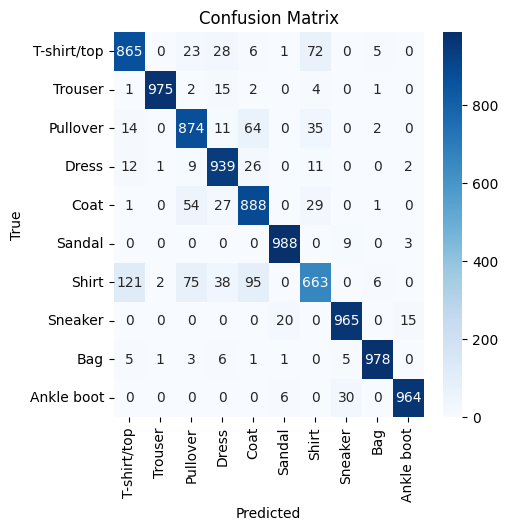

' \nThe confusion matrix visualizes class-wise prediction performance, with diagonal values representing correct classifications and off-diagonal values indicating misclassifications.\n'

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(5,5))
sns.heatmap(
    cm,
    annot=True,        
    fmt='d',           
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
tick_marks = np.arange(len(class_names))

plt.show()

''' 
The confusion matrix visualizes class-wise prediction performance, with diagonal values representing correct classifications and off-diagonal values indicating misclassifications.
'''


In [36]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("coat.jfif", cv2.IMREAD_GRAYSCALE)
# Resize to 28x28 (Fashion-MNIST original size)
img = cv2.resize(img, (28, 28))

img=img.astype('float32')/255.0  # Normalize

img = 1.0 - img    # invert  the image  beacuse Fashion-MNIST uses white object on black background.

# print(img)

# Pad to 32x32 (for LeNet-5)
img = np.pad(img, ((2,2), (2,2)), mode='constant')  # zero padding
# print(img)
# Reshape for model
img = img.reshape(1, 32, 32, 1)


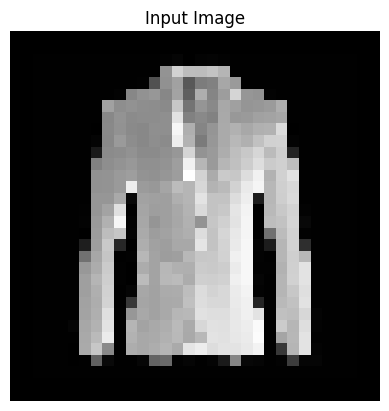

In [42]:
plt.imshow(img[0,:,:,0], cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

In [43]:
prediction = model.predict(img)
print(prediction)
predicted_class = np.argmax(prediction)
print(predicted_class)

print("Predicted label:", predicted_class)
print("Predicted class:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[3.4596387e-03 2.2695287e-06 9.0846352e-02 2.6210032e-03 2.5062519e-01
  8.8025750e-05 6.5233535e-01 1.4066501e-06 1.7397306e-05 3.3437125e-06]]
6
Predicted label: 6
Predicted class: Shirt
